In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import plot_b, plot_b_seg, trj_2d, set_font_size
from ppln_model import RateBasedAdaptivePpln, RateBasedSSAPpln

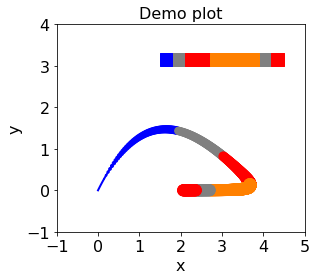

In [2]:
# test plotting bout trajectory
t = np.arange(0, 5, .01)
x = [5*t*np.exp(-t/2), 10*t*np.exp(-t/.4)]
b = np.zeros(len(t), dtype=int)
b[t < .5] = 1
b[(1 <= t) & (t < 2)] = 2
b[(2 <= t) & (t < 4)] = 3
b[(4.5 <= t)] = 2

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4), tight_layout=True)
plot_b(ax, t, b, [1.5, 4.5, 3., 3.3], c=['gray', 'b', 'r', (1, .5, 0)])
trj_2d(ax, t, x[0], x[1], b, c=['gray', 'b', 'r', (1, .5, 0)], s_max=500, v_max=10, gam=.1)
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 4)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Demo plot')
set_font_size(ax, 16)

# Stimulus-invariant adaptation

$$\tau_x \frac{dx}{dt} = -x + (x_sI_s + x_pI_p + x_fI_f)(1-a)$$

$$\tau_a \frac{da}{dt} = -a + (I_s + I_p + I_f)$$

$$0 \leq I_s + I_p + I_f \leq 1$$

# Stimulus-selective adaptation

$$\tau_x\frac{dx}{dt} = -x + (x_s - a_s)I_s(t) + (x_{p} - a_{p})I_{p}(t) + (x_{f} - a_{f})I_{f}(t)$$

$$\tau_a\frac{da_s}{dt} = -a_s + x_sI_s(t) \quad \quad \quad \textrm{sine}$$

$$\tau_a\frac{da_{p}}{dt} = -a_{p} + x_{p}I_{p}(t) \quad \quad \quad \textrm{pulse slow}$$

$$\tau_a\frac{da_{f}}{dt} = -a_{f} + x_{f}I_{f}(t) \quad \quad \quad \textrm{pulse fast}$$

# Model comparison for basic bouts

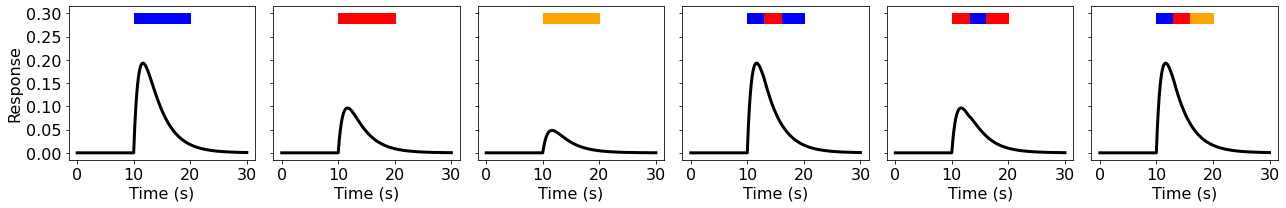

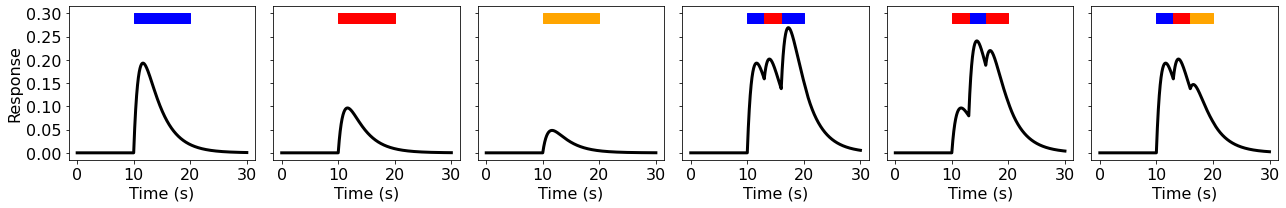

In [3]:
# single-mode inputs
DT = .01
t = np.arange(0, 30, DT)

pplns = [
    RateBasedAdaptivePpln(3, 1, 1, .5, .25),
    RateBasedSSAPpln(3, 1, 1, .5, .25),
]

b_segs = [
    {1: [(10, 20)], 2: [], 3: []},  # sine
    {1: [], 2: [(10, 20)], 3: []},  # p-slow
    {1: [], 2: [], 3: [(10, 20)]},  # p-fast
    {1: [(10, 13), (16, 20)], 2: [(13, 16)], 3: []},  # SPS
    {1: [(13, 16)], 2: [(10, 13), (16, 20)], 3: []},  # PSP
    {1: [(10, 13)], 2: [(13, 16)], 3: [(16, 20)]},  # SPF
]

for ppln in pplns:
    
    xs = []
    
    # test sine, pslow, pfast inps
    for ts in b_segs:
        xs.append(ppln.run_b_seg(t, t_s=ts[1], t_p=ts[2], t_f=ts[3])[0])
   
    fig, axs = plt.subplots(1, 6, figsize=(18, 3), tight_layout=True, sharey=True)
    for x, ax, ts in zip(xs, axs, b_segs):
        ax.plot(t, x, lw=3, c='k')
        plot_b_seg(ax, ts, extent=[0, 30, .28, .3], c=['gray', 'b', 'r', 'orange'])
        ax.set_xlabel('Time (s)')

    axs[0].set_ylabel('Response')
    set_font_size(axs, 16)

# Repeat for vector bout representation

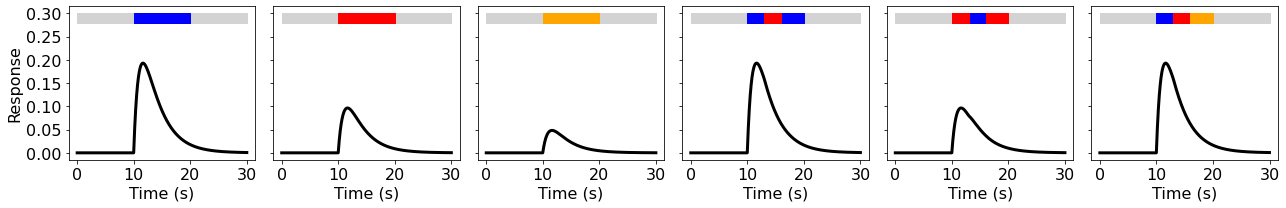

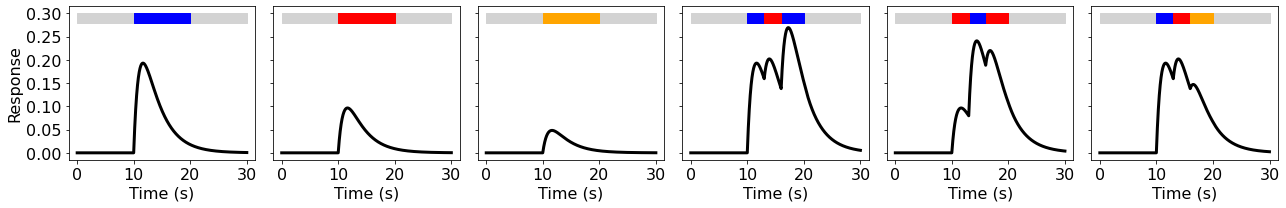

In [4]:
# single-mode inputs
cc = np.concatenate

DT = .01
t = np.arange(0, 30, DT)

pplns = [
    RateBasedAdaptivePpln(3, 1, 1, .5, .25),
    RateBasedSSAPpln(3, 1, 1, .5, .25),
]

DT_BT = 1/30.03

bts = [
    cc([np.repeat(0, int(round(10/DT_BT))), np.repeat(1, int(round(10/DT_BT))), np.repeat(0, int(round(10/DT_BT)))]),
    cc([np.repeat(0, int(round(10/DT_BT))), np.repeat(2, int(round(10/DT_BT))), np.repeat(0, int(round(10/DT_BT)))]),
    cc([np.repeat(0, int(round(10/DT_BT))), np.repeat(3, int(round(10/DT_BT))), np.repeat(0, int(round(10/DT_BT)))]),
    cc([np.repeat(0, int(round(10/DT_BT))), np.repeat(1, int(round(3/DT_BT))), np.repeat(2, int(round(3/DT_BT))), np.repeat(1, int(round(4/DT_BT))), np.repeat(0, int(round(10/DT_BT)))]),
    cc([np.repeat(0, int(round(10/DT_BT))), np.repeat(2, int(round(3/DT_BT))), np.repeat(1, int(round(3/DT_BT))), np.repeat(2, int(round(4/DT_BT))), np.repeat(0, int(round(10/DT_BT)))]),
    cc([np.repeat(0, int(round(10/DT_BT))), np.repeat(1, int(round(3/DT_BT))), np.repeat(2, int(round(3/DT_BT))), np.repeat(3, int(round(4/DT_BT))), np.repeat(0, int(round(10/DT_BT)))]),
]

for ppln in pplns:
    
    xs = []
    
    # test sine, pslow, pfast inps
    for bt in bts:
        xs.append(ppln.run_b(t=t, b=bt, dt_bt=DT_BT)[0])
   
    fig, axs = plt.subplots(1, 6, figsize=(18, 3), tight_layout=True, sharey=True)
    
    for x, ax, bt in zip(xs, axs, bts):
        ax.plot(t, x, lw=3, c='k')
        t_bt = np.arange(len(bt), dtype=float)*DT_BT
        plot_b(ax, t_bt, bt, extent=[0, 30, .28, .3], c=['lightgray', 'b', 'r', 'orange'])
        ax.set_xlabel('Time (s)')

    axs[0].set_ylabel('Response')
    set_font_size(axs, 16)